In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('../data/dataset_regression.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.isnull().sum().sum()

0

In [12]:
y = df["price_usd"]
X = df.drop(["price_usd"], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [14]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_5 <= 2007.50
|   |--- feature_5 <= 2001.50
|   |   |--- feature_9 <= 2.15
|   |   |   |--- value: [1949.75]
|   |   |--- feature_9 >  2.15
|   |   |   |--- value: [3690.04]
|   |--- feature_5 >  2001.50
|   |   |--- feature_9 <= 2.45
|   |   |   |--- value: [5361.74]
|   |   |--- feature_9 >  2.45
|   |   |   |--- value: [8818.85]
|--- feature_5 >  2007.50
|   |--- feature_9 <= 1.95
|   |   |--- feature_5 <= 2012.50
|   |   |   |--- value: [7285.85]
|   |   |--- feature_5 >  2012.50
|   |   |   |--- value: [12488.34]
|   |--- feature_9 >  1.95
|   |   |--- feature_5 <= 2013.50
|   |   |   |--- value: [14298.25]
|   |   |--- feature_5 >  2013.50
|   |   |   |--- value: [24213.36]



In [16]:
# target_names = list(map(str, y.unique()))
features = list(df.columns)[:-1]

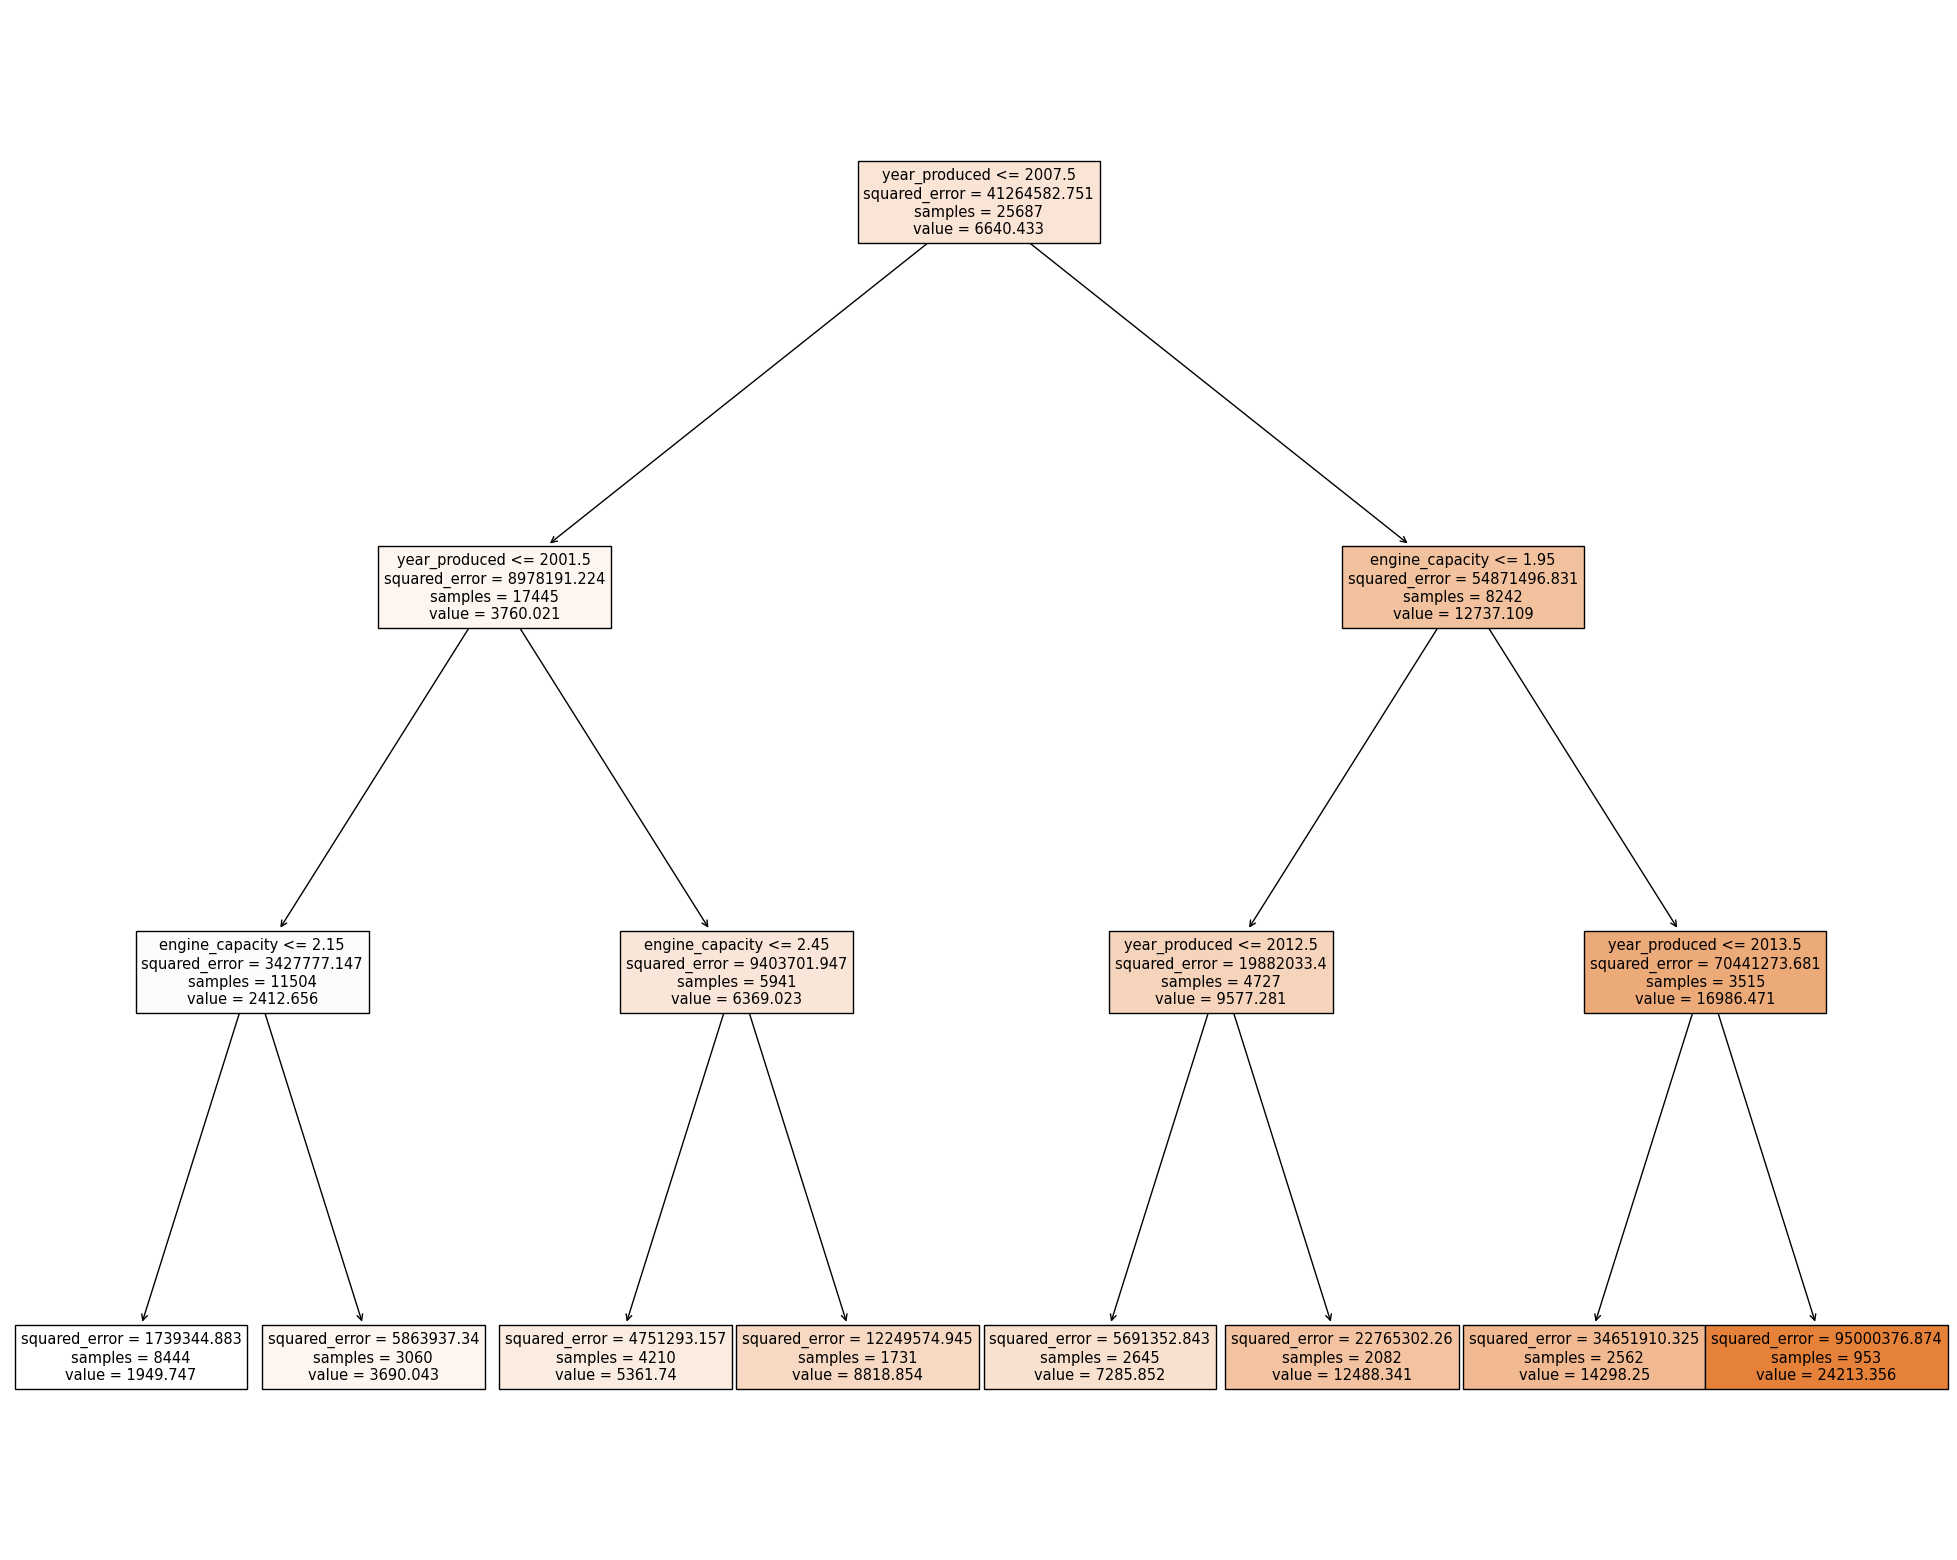

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=features, filled=True)

In [28]:
regr = GridSearchCV(DecisionTreeRegressor(),
                                            {
                                            'criterion': ["squared_error", "friedman_mse", "absolute_error"],
                                            'max_depth': np.array(range(1, 2*X_train.shape[1]+1)),
                                            },
                                            cv=2,
                                            n_jobs=3,
                                            ).fit(X_train[0:10000], y_train[0:10000])

In [29]:
regr.best_params_

{'criterion': 'absolute_error', 'max_depth': 7}

In [30]:
X_test.shape

(12844, 29)

In [31]:
y_pred = regr.predict(X_test[0:10000])

In [35]:
print(f'MAE: {mean_absolute_error(y_test[0:10000], y_pred)}')
print(f'MSE: {mean_squared_error(y_test[0:10000], y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test[0:10000], y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test[0:10000], y_pred)}')
print(f'R^2: {regr.score(X_test[0:10000], y_test[0:10000])}')

MAE: 1620.3024
MSE: 7905522.86759359
RMSE: 2811.6761669142466
MAPE: 0.6250115157237038
R^2: 0.8135718426884315
